# An example using Feature weighted ECM clustering
### With IRIS (UCI dataset)

In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm_tridv import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


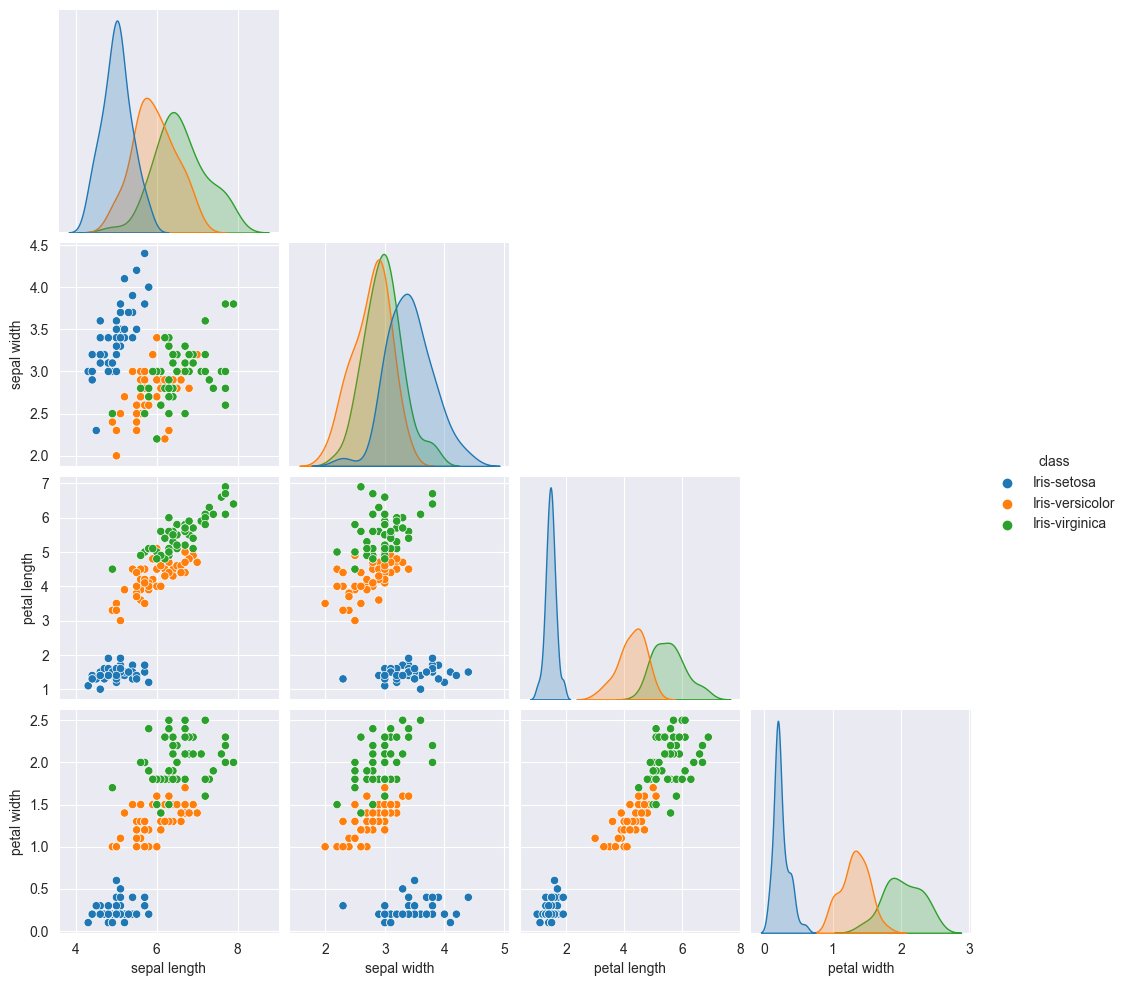

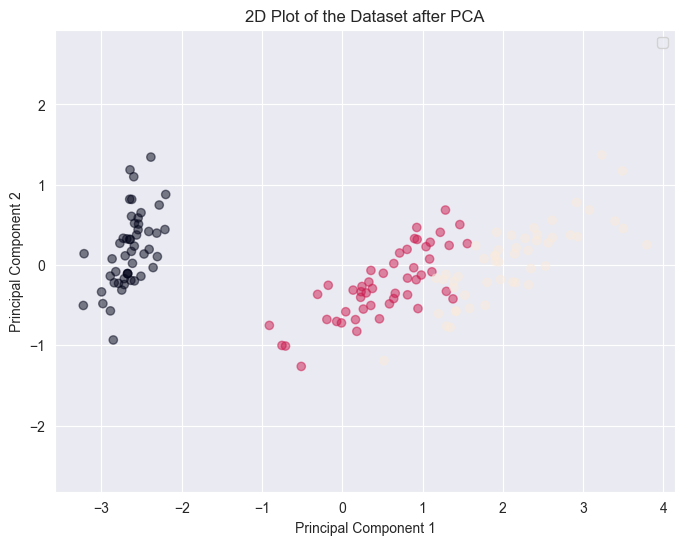

In [2]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])
df = pd.concat([X, y], axis=1)

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 31.84506332984426]
[2, 31.333973093812297]
[3, 31.13213602650386]
[4, 30.96615114502699]
[5, 30.80019473627689]
[6, 30.624384264616534]
[7, 30.43986779582911]
[8, 30.256713061794862]
[9, 30.09043685613914]
[10, 29.9555824820937]
[11, 29.85838311652485]
[12, 29.79475036441266]
[13, 29.75548808577431]
[14, 29.731930003986317]
[15, 29.7179421875652]
[16, 29.7096650146929]
[17, 29.704773720271106]
[18, 29.70188657814484]
[19, 29.70018479526291]
[20, 29.699183403308492]
[21, 29.69859529954179]


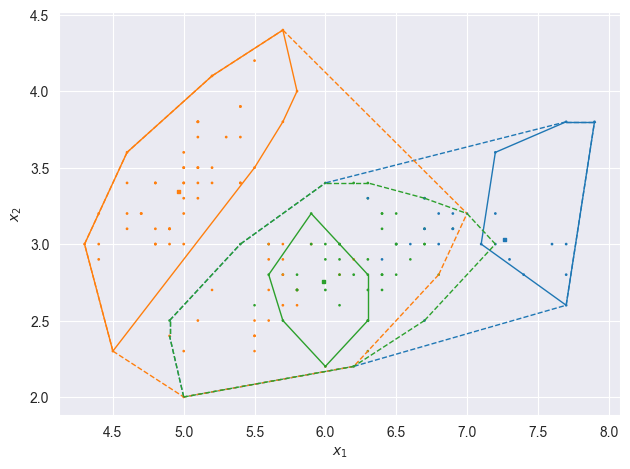

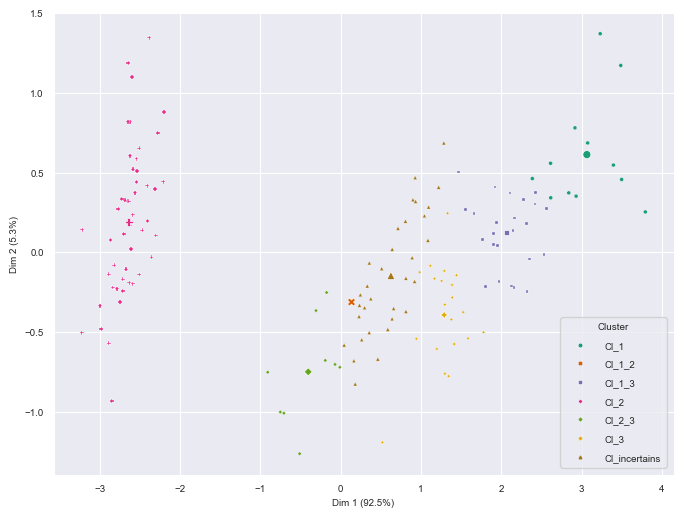

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.4064492765032829
Maximum Non-specificity value: 8.729107684717466
Minimum Non-specificity value: 0.3411886821837392
Average Non-specificity value: 2.2510084986536616


In [5]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=0.1, delta=19)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

Intitial noise weights: [0.26966014 0.29261915 0.23270438 0.20501632]
Initial weight matrix: 
 [[0.23513543 0.06848627 0.10370274 0.59267556]
 [0.31326868 0.12249508 0.15906177 0.40517447]
 [0.72686983 0.04091465 0.01131534 0.22090018]]
[1, 2.3532852591570776]
[2, 2.270693844408749]
[3, 2.2436445481263685]
[4, 2.2311792827643986]
[5, 2.224243865697977]
[6, 2.219881372000165]
[7, 2.2168748949163866]
[8, 2.2146376343586347]
[9, 2.212846522970616]
[10, 2.211302491483215]
[11, 2.209869956995171]
[12, 2.2084472266508]
[13, 2.2069508327416423]
[14, 2.20530775907317]
[15, 2.2034538727323327]
[16, 2.2013386239532697]
[17, 2.1989356593807496]
[18, 2.196255632029689]
[19, 2.1933520893303076]
[20, 2.1903098989478216]
[21, 2.1872157331712314]
[22, 2.1841263491981566]
[23, 2.1810535094287524]
[24, 2.177969076989179]
[25, 2.1748190851381137]
[26, 2.1715349844730585]
[27, 2.168037506289704]
[28, 2.164234016911399]
[29, 2.160011824936015]
[30, 2.155229865582515]
[31, 2.1497117511594355]
[32, 2.1432457

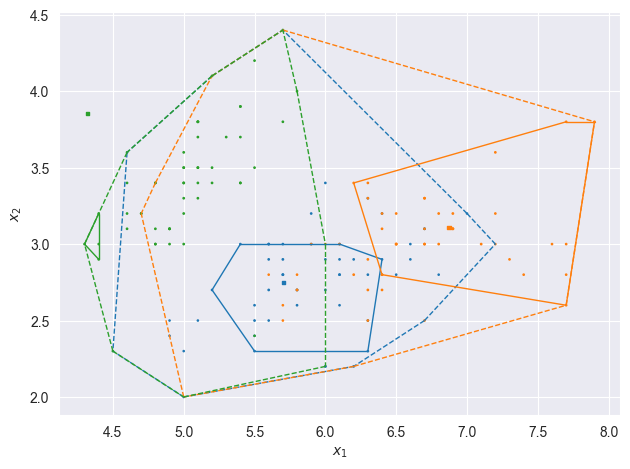

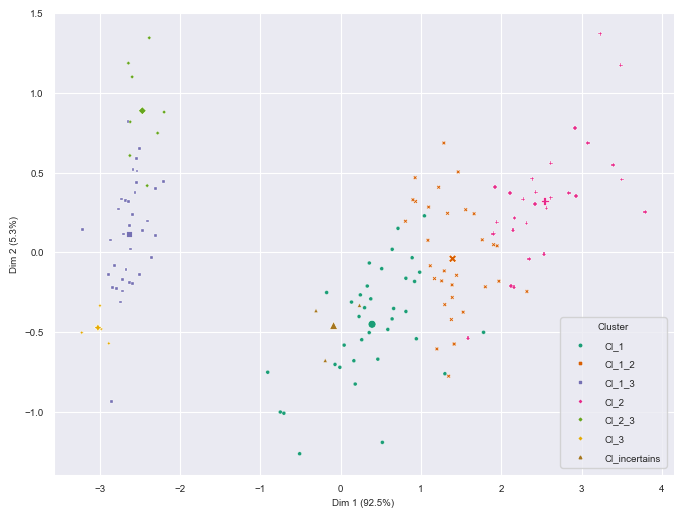

Weight matrix: 
 [[2.33549697e-01 7.37817867e-02 1.01379131e-01 5.91289385e-01]
 [3.09368378e-01 1.28504198e-01 1.55464488e-01 4.06662936e-01]
 [7.34370001e-01 4.81986628e-02 8.34166430e-06 2.17422994e-01]]
Covariance Matrix 1: [0.3665601  0.06845269 0.44297101 0.11466752]
Covariance Matrix 2: [0.15447115 0.28515385 0.94077885 0.15566346]
Covariance Matrix 3: [0.21295833 0.11429167 0.06       0.09266667]


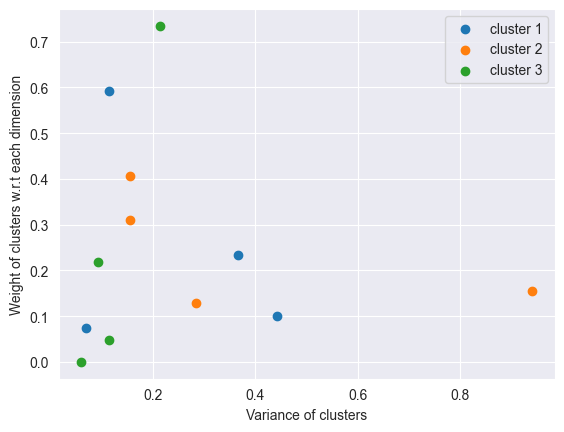

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.8509627406851713
Maximum Non-specificity value: 7.305017776053893
Minimum Non-specificity value: 0.07986501475579014
Average Non-specificity value: 1.4227177781973628


In [12]:
# Feature weighted ECM clustering
c = 3
model = fwecm(x=X, c=c, beta=2, alpha=0.1, delta=19)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Weight-Variance correlation plot
W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Non-specificity equation
![test.png](assets/Non-specificity.png)